EXPLATORY DATA ANALYSYS & INTRO

In [4]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\PHYLOSHOFI\anaconda3\envs\python_portfolio\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

Generating train split: 100%|██████████| 785741/785741 [01:04<00:00, 12196.14 examples/s]


In [7]:
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short'] == 'Data Analyst')]

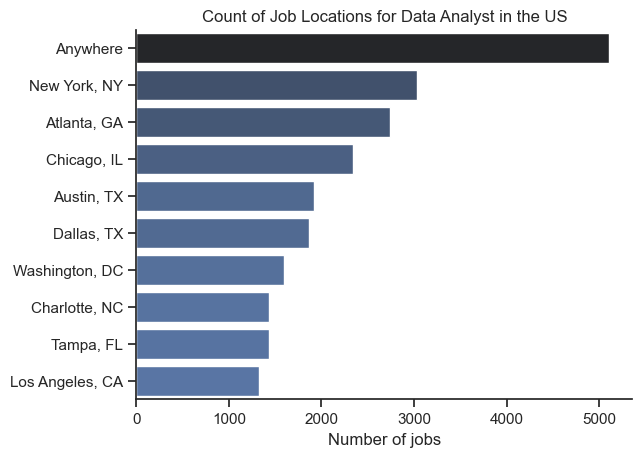

In [17]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Job Locations for Data Analyst in the US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

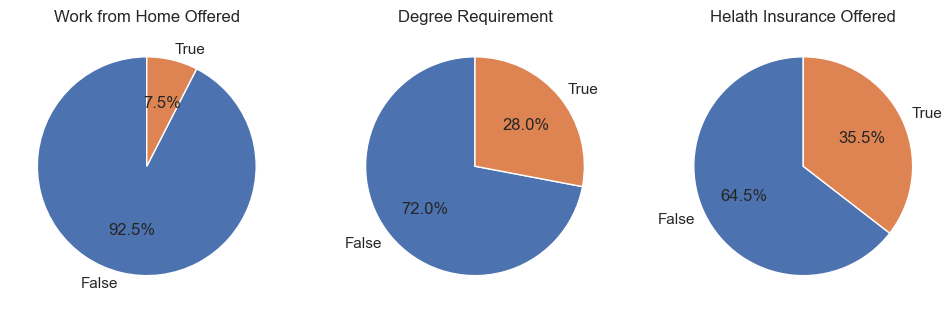

In [18]:
#Rewrite the above woth a for loop
dict_column = {
  'job_work_from_home' : 'Work from Home Offered',
  'job_no_degree_mention' : 'Degree Requirement',
  'job_health_insurance' : 'Helath Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
  ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
  ax[i].set_title(title)

#plt.suptitle('Benefit Analysys of Data Jobs', fontsize=16)
plt.show()


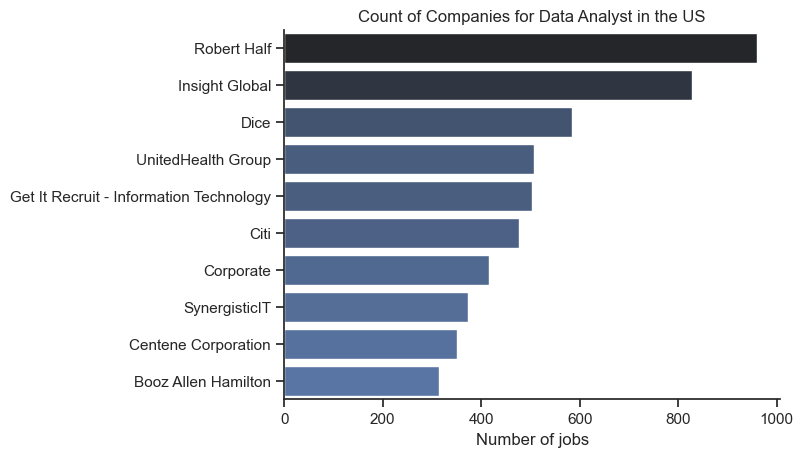

In [19]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Companies for Data Analyst in the US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()